# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project, we will be analzying the information on an estimated 10,000 movies contained in the dataset collected from The Movie Database (TMDb). 

>The columns in this set are self-explanatory and include: *['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj']*
* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
* There are some odd characters in the ‘cast’ column.
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time

### Question(s) for Analysis

>Our analysis would revolve around the following set of questions:
* Do ratings correlate with popularity?
* Which movies were the most popular and highest rated over the years?
* Do higher rated movies generate more revenue?
* Do movies with bigger budgets generate higher revenue?


In [175]:
# Let's import the required libraries to aid our investigation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [176]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade py

Requirement already up-to-date: py in /opt/conda/lib/python3.6/site-packages (1.11.0)


<a id='wrangling'></a>
## Data Wrangling: General Properties

In [177]:
# Load data

df = pd.read_csv('tmdb_movies.csv')

# look for instances of missing or possibly errant data.

In [178]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [179]:
# Defining the number of rows and columns in the data 

df.shape

(10866, 21)

There are a total of 10,866 rows and 21 columns in this dataset

In [180]:
# Checking for null values and  data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The **release_date** data type is being recognized as an object. This can be converted to the date data type.

In [181]:
# Summarizing the descriptive statistics for our data.

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There are some zero (0) values under the *budget, runtime, revenue, budget_adj, and revenue_adj*. This is noteworthy for cleaning purposes.

In [182]:
# Checking for columns with null values

df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

It appears that columns: *imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', and 'production_companies'* are the only columns with null values. This is particularly pronounced in the **homepage** column.

All these are not vital to our analysis. 

In [183]:
# What's the count of distinct values in each column?
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [184]:
# Let's check for duplicates
sum(df.duplicated())

1

One row of data seems to have been duplicated. This will be corrected during our Data Cleaning phase.


### Data Cleaning

In order to clean our data, we would proceed to do the following:

* Deletion of duplicates.
* Dropping irrelevant columns
* Remove of all Null rows
* Changing the data type of *release_date* to datetime
* Replacing zero values with the respective averages

### Deletion of Duplicates

We observed, during our assessment, that one row of data was duplicated. Let us begin by dropping this row from our set.

In [185]:
df.drop_duplicates(inplace = True)

# Re-confirming the presence of duplicates
sum(df.duplicated())

0

### Exclusion of Irrelevant Columns

The following columns are not essential to our analysis: *'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'budget', and 'revenue'*

In [186]:
columns = ['cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'budget', 'revenue']
df.drop(labels=columns, axis=1, inplace=True)

In [187]:
# Let's check the columns in the current dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id                10865 non-null int64
imdb_id           10855 non-null object
popularity        10865 non-null float64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.1+ MB


### Removal of all Null Rows

In order to enhance the precision of our analysis, null values contained in rows would be deleted.

In [188]:
# This removes all rows containing null values
df.dropna(axis=0, inplace=True)
# Let's confirm if this has been effected:
df.shape

(10834, 12)

### Changing the release_date Data Type

The subject column is an 'object' data type; let us convert this to a befitting data type - 'datetime'

In [189]:
df['release_date']=pd.to_datetime(df['release_date'])

# Checking for the newly converted data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 12 columns):
id                10834 non-null int64
imdb_id           10834 non-null object
popularity        10834 non-null float64
original_title    10834 non-null object
runtime           10834 non-null int64
genres            10834 non-null object
release_date      10834 non-null datetime64[ns]
vote_count        10834 non-null int64
vote_average      10834 non-null float64
release_year      10834 non-null int64
budget_adj        10834 non-null float64
revenue_adj       10834 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 1.1+ MB


### Replacing Zero Values with Mean

As earlier recognized, the parameters 'runtime', 'budget_adj', and 'revenue_adj' have zero values. These would be replaced by the respective averages.

In [190]:
# Calculating the budget_adj mean
mean_b = df['budget_adj'].mean()
mean_b

17600108.008642178

In [191]:
# Replacing values with mean
df['budget_adj'] = df['budget_adj'].replace(0, 17551039.82288678)

In [192]:
# Calculating the 'runtime' mean
mean_run = df['runtime'].mean()
mean_run

102.16272844748015

In [193]:
# Replacing values with mean
df['runtime'] = df['runtime'].replace(0, 102.07086324314375)

In [194]:
# Calculating the 'revenue_adj' mean
mean_rev = df['revenue_adj'].mean()
mean_rev

51515987.087855384

In [195]:
# Replacing values with mean
df['revenue_adj'] = df['revenue_adj'].replace(0, 51364363.253250986)

In [196]:
# Confirming if the changes have been effected:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,1.083400e+04,1.083400e+04
mean,65811.569042,0.647776,102.445369,217.970833,5.973159,2001.308196,2.678063e+07,7.989108e+07
std,91927.169054,1.001316,30.798053,576.368151,0.933831,12.815839,3.054763e+07,1.367520e+08
min,5.000000,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10587.250000,0.208387,90.000000,17.000000,5.400000,1995.000000,1.755104e+07,5.136436e+07
50%,20541.500000,0.384587,99.000000,38.000000,6.000000,2006.000000,1.755104e+07,5.136436e+07
75%,75146.000000,0.715767,111.000000,146.000000,6.600000,2011.000000,2.094246e+07,5.136436e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [197]:
df.head(2)

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis

Let's attempt to probe our data further for insights into the highlighted question!


###  Do ratings correlate with popularity?

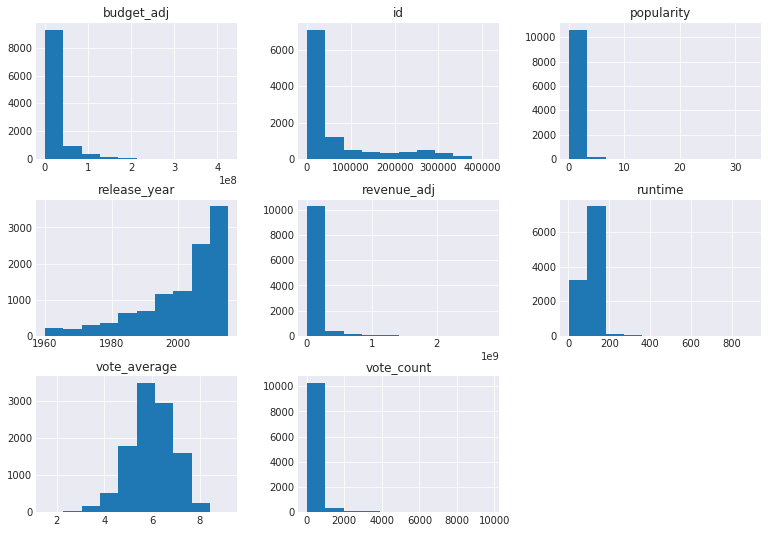

In [198]:
# Exploring all the parameters via a histogram

sns.set_style('darkgrid')
df.hist(figsize = (13,9));

The above histogram charts give us an idea of the nature of our data type. Majority of movies fall within the average ratings of 4.5 to 7.5. Also, the most frequent popularity level ranges between 0 and 10.

In [199]:
# Let's create a function for scattered plots visualizations
def quick_plot(x,y):
   return df.plot(x=x, y=y, kind ='scatter', figsize = (11,7))

Text(0.5,1,'Relationship between Average Votes and Popularity')

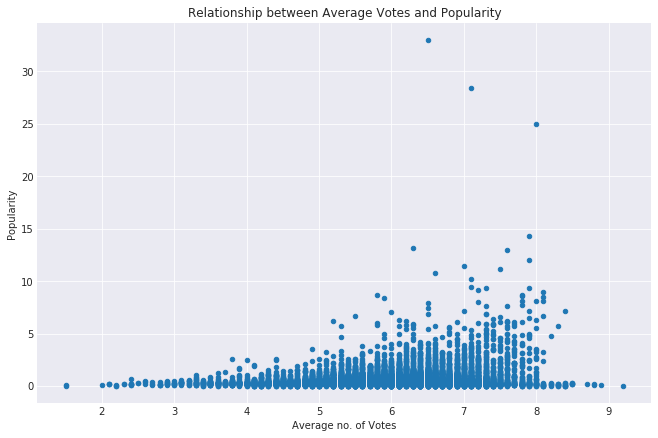

In [216]:
# Checking for the relationship between 'Average Votes' and 'Popularity'

quick_plot(x = 'vote_average', y = 'popularity');
plt.xlabel("Average no. of Votes")
plt.ylabel("Popularity")
plt.title("Relationship between Average Votes and Popularity")

Text(0,0.5,'Popularity')

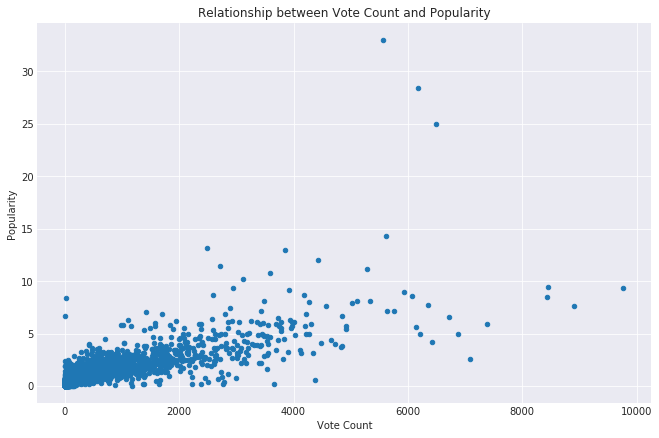

In [201]:
# Checking for the relationship between 'Vote Count' and 'Popularity'

quick_plot(x = 'vote_count', y = 'popularity')
plt.title("Relationship between Vote Count and Popularity")
plt.xlabel("Vote Count")
plt.ylabel("Popularity")

It appears that neither *vote_count* nor *vote_average* significantly controls the popularity of a released movie.

### Which movies were the most popular and highest rated over the years?

In [202]:
df.head(1)

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [203]:
# Top 10 by voting_average/ratings

top_by_rating = df[['vote_average', 'original_title', 'popularity']].sort_values(by='vote_average', ascending=False).head(10)
top_by_rating

,vote_average,original_title,popularity
3894,9.2,The Story of Film: An Odyssey,0.006925
538,8.9,The Mask You Live In,0.114264
1200,8.8,Black Mirror: White Christmas,0.129531
2269,8.8,Life Cycles,0.222293
6911,8.7,Pink Floyd: Pulse,0.212010
8221,8.5,A Personal Journey with Martin Scorsese Throug...,0.194889
3224,8.5,John Mayer: Where the Light Is Live in Los Ang...,0.224721
8839,8.5,Dave Chappelle: Killin' Them Softly,0.157001
3690,8.5,The Art of Flight,0.321341
8411,8.5,Queen - Rock Montreal,0.302908


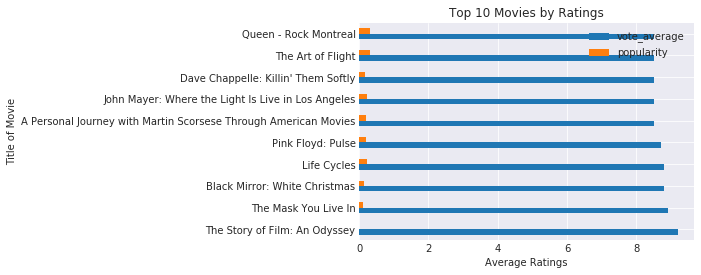

In [204]:
top_by_rating = top_by_rating.set_index('original_title').plot(kind='barh')
top_by_rating.set_ylabel('Title of Movie')
top_by_rating.set_xlabel('Average Ratings')
top_by_rating.set_title('Top 10 Movies by Ratings')

plt.show();

In [205]:
# Top 10 by Popularity
top_by_pop = df[['original_title', 'popularity', 'vote_average']].sort_values(by='popularity', ascending=False).head(10)
top_by_pop

,original_title,popularity,vote_average
0,Jurassic World,32.985763,6.5
1,Mad Max: Fury Road,28.419936,7.1
629,Interstellar,24.949134,8.0
630,Guardians of the Galaxy,14.311205,7.9
2,Insurgent,13.112507,6.3
631,Captain America: The Winter Soldier,12.971027,7.6
1329,Star Wars,12.037933,7.9
632,John Wick,11.422751,7.0
3,Star Wars: The Force Awakens,11.173104,7.5
633,The Hunger Games: Mockingjay - Part 1,10.739009,6.6


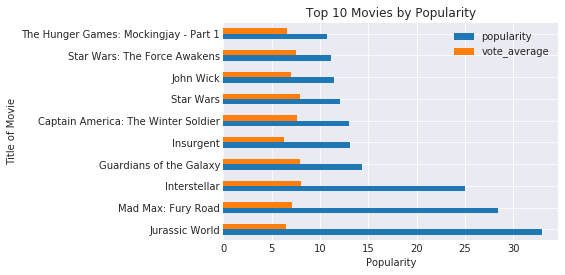

In [206]:
top_by_pop = top_by_pop.set_index('original_title').plot(kind='barh')
top_by_pop.set_ylabel('Title of Movie')
top_by_pop.set_xlabel('Popularity')
top_by_pop.set_title('Top 10 Movies by Popularity')

plt.show();

With respect to our first analysis on the correlation between popularity and ratings, it might be interesting to see how the top 10 movies by popularity fare ratings-wise.

In [207]:
top_by_pop = df[['original_title','release_date', 'popularity', 'vote_average']].sort_values(by='popularity', ascending=False).head(10)
top_by_pop

,original_title,release_date,popularity,vote_average
0,Jurassic World,2015-06-09,32.985763,6.5
1,Mad Max: Fury Road,2015-05-13,28.419936,7.1
629,Interstellar,2014-11-05,24.949134,8.0
630,Guardians of the Galaxy,2014-07-30,14.311205,7.9
2,Insurgent,2015-03-18,13.112507,6.3
631,Captain America: The Winter Soldier,2014-03-20,12.971027,7.6
1329,Star Wars,1977-03-20,12.037933,7.9
632,John Wick,2014-10-22,11.422751,7.0
3,Star Wars: The Force Awakens,2015-12-15,11.173104,7.5
633,The Hunger Games: Mockingjay - Part 1,2014-11-18,10.739009,6.6


In [208]:
top_by_pop = df[['original_title','release_date', 'popularity', 'vote_average']].sort_values(by='popularity', ascending=True).head(10)
top_by_pop

,original_title,release_date,popularity,vote_average
6181,"North and South, Book I",1985-11-03,0.000065,6.0
9977,The Hospital,2071-12-14,0.000188,6.4
6080,G.B.F.,2013-10-20,0.000620,6.1
6551,Mon petit doigt m'a dit...,2005-04-13,0.000973,5.7
6961,Khosla Ka Ghosla!,2006-09-22,0.001115,6.8
7268,Born into Brothels,2004-12-08,0.001117,6.4
7256,SoupÃ§ons,2004-06-01,0.001315,7.5
3370,Fuera de carta,2008-04-11,0.001317,5.3
2874,Slashers,2001-01-01,0.001349,5.5
4948,The Invisible War,2012-01-20,0.001372,7.0


This supports the conjecture that **Popularity** must be affected by a variety of factors. We can see here how some far less popular movies have the same or higher ratings than the more popular ones.

### Do higher rated movies generate more revenue?

Text(0.5,0,'Average no of Votes')

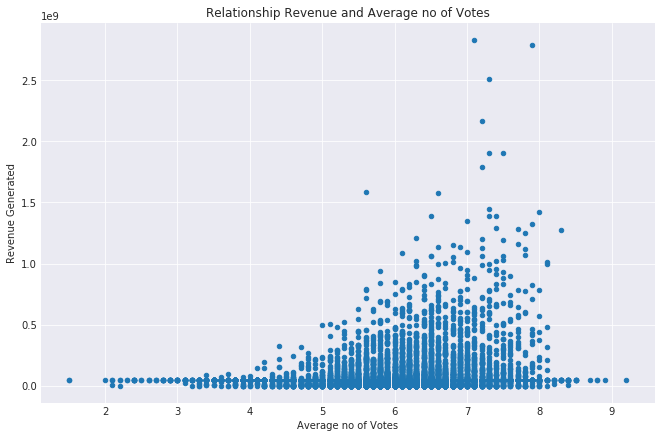

In [219]:
quick_plot(x = 'vote_average', y = 'revenue_adj')
plt.title('Relationship Revenue and Average no of Votes')
plt.ylabel('Revenue Generated');
plt.xlabel('Average no of Votes')

In [210]:
df['vote_average'].corr(df['revenue_adj'])

0.1741565229707944

There is apparently no distinct linear relationship between *revenue* and *rating*. A highly-rated movie may rake in relatively low revenue. However, there seems to be a rating-threshold for revenue values of 1.0 (i.e 10^9) and above. Movies that have generated this amount of revenue or higher appear to be rated around 6.0 and higher. This suggests that ratings, as well as some currently obscure factors, positively influence the revenue-generating potential of movies at certail levels.

### Do movies with bigger budgets generate higher revenue?

Are movies with extended production times backed by higher budgets due to the costs that may be incurred during production?

In [211]:
df_budrev = df[['budget_adj', 'revenue_adj']]
df_budrev.head()

,budget_adj,revenue_adj
0,1.379999e+08,1.392446e+09
1,1.379999e+08,3.481613e+08
2,1.012000e+08,2.716190e+08
3,1.839999e+08,1.902723e+09
4,1.747999e+08,1.385749e+09


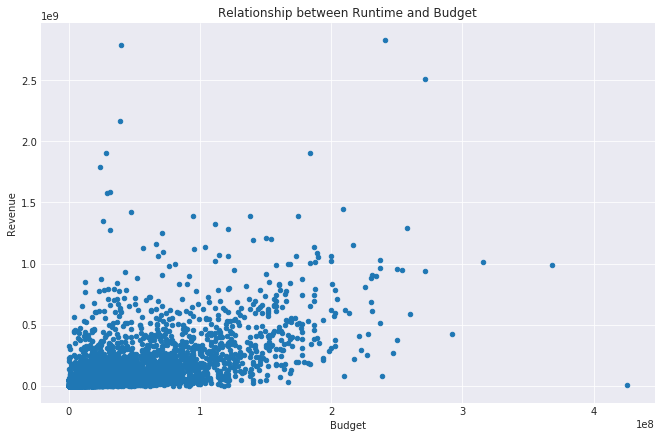

In [222]:
# Plot scatter plot of these two columns

quick_plot(x = 'budget_adj', y = 'revenue_adj')
plt.title('Relationship between Runtime and Budget')
plt.ylabel('Revenue');
plt.xlabel('Budget');

In [213]:
df['budget_adj'].corr(df['revenue_adj'])

0.60208740940050498

Albeit the outliers, there is an appreciable level of correlation between these two variables (pegged at approximately 0.6). Movies with higher budget tend to rack in more revenue. However, revenue seems to be affected by other factors such as ratings/voting average as well, so the movies with the biggest budget do not necessarily always generate the higherst revenue.

<a id='conclusions'></a>
## Conclusions


> From the analysis, ratings do not appear to significantly control the popularity of a released movie. Some highly rated movies recorded lesser popularity than lower rated movies. This means that the popularity of a movie is not heavily dependent on its ratings, and is influenced by some other factors as well. The highest rated movie (9.2) by the number of average votes, The Story of Film: An Odyssey, falls in the least popular percentile. In contrast, the most popular movie, Jurassic World, has a rating of 6.5 which is lower than many of the less popular movies.

> In the test for the relationship between ratings and revenue, the result proved low. However, ratings seem to be respected at a particular threshold. Movies with revenues of 1bn and above generally have ratings between 6.0 and above. This is an interesting point for some additional research.

> Some limitiations that may hamper analysis include:
* The number of cleaned null values which existed in the dataset poses a limitation with respect to the accuracy of the data and the analysis that subsequently followed. 
* We are also not clear on how the rating system works. Are the votes based off a general perception, or critical review, and were these done by qualified voters.

In [223]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

## References

> The below sites proved to be of great help in learning some codes.

* [http://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html]

* [https://www.geeksforgeeks.org/python-pandas-dataframe-max/?ref=lbp]